In [48]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [6]:
(X_train, y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

In [8]:
X_train.shape

(60000, 28, 28)

In [63]:
X_train = X_train/255
X_test =X_test/255

In [15]:
y_train.shape

(60000,)

In [24]:
model =keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])
model.fit(X_train, y_train , epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5655 - loss: 1.6998
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8607 - loss: 0.5485
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8892 - loss: 0.4064
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9027 - loss: 0.3527
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9080 - loss: 0.3266


In [25]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9013 - loss: 0.3434


[0.30151307582855225, 0.9144999980926514]

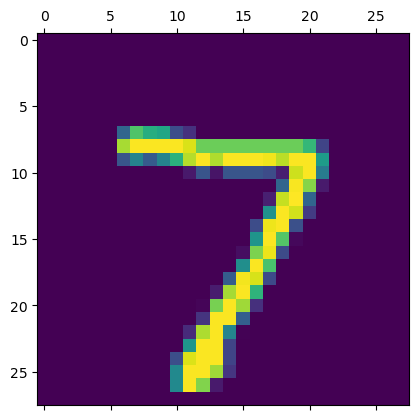

In [62]:
plt.matshow(X_test[0])
plt.show()

In [39]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step


In [41]:
np.argmax(y_pred[0])

7

In [44]:
y_pred_list = [np.argmax(i) for i in y_pred]

In [45]:
y_pred_list[:5]

[7, 2, 1, 0, 4]

In [47]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [51]:
cm = tf.math.confusion_matrix(labels = y_test, predictions= y_pred_list) 
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    1,    1,    0,    5,   11,    1,    3,    0],
       [   0, 1107,    2,    2,    0,    2,    4,    1,   17,    0],
       [  12,    7,  909,   19,   10,    2,   20,   11,   38,    4],
       [   2,    1,   18,  913,    0,   31,    2,   15,   20,    8],
       [   1,    5,    3,    2,  902,    1,   17,    2,    6,   43],
       [  10,    3,    3,   38,    7,  773,   19,    7,   25,    7],
       [  14,    3,    5,    1,    9,   16,  907,    1,    2,    0],
       [   5,   14,   22,    6,    7,    0,    0,  933,    3,   38],
       [  10,    7,    8,   29,   11,   34,   13,    7,  840,   15],
       [  15,    7,    2,   14,   34,   10,    0,   19,    5,  903]])>

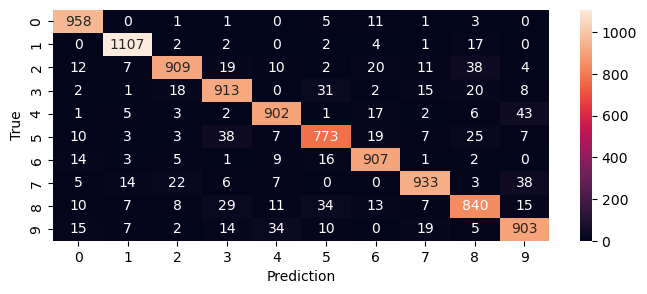

In [56]:
import seaborn as sns
plt.figure(figsize=(8,3))
sns.heatmap(cm, annot =True, fmt = 'd')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.show()